In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from scikeras.wrappers import KerasClassifier, KerasRegressor


In [2]:
#!pip install pydot

In [3]:
#!pip install tensorflow

In [4]:
#!pip install keras

In [5]:
#!pip install keras

In [6]:
#!pip install scikeras

In [7]:
orig=mnist

In [8]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [9]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
X_test_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
X_train_digit[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

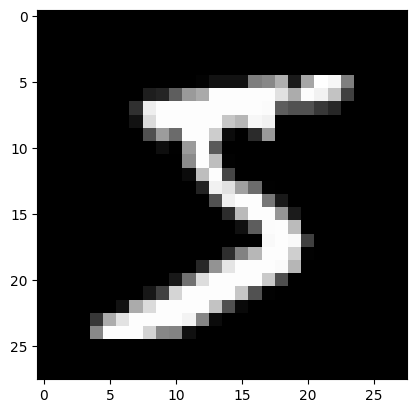

In [14]:
plt.imshow(X_train_digit[0], cmap='gray')

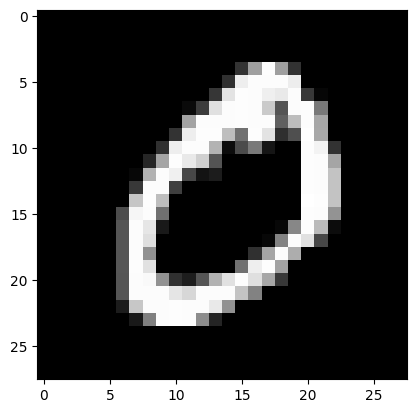

In [15]:
plt.imshow(X_train_digit[1], cmap='gray')

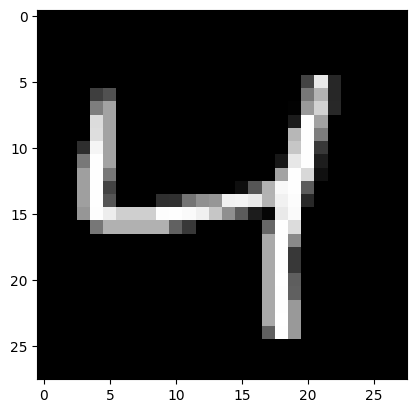

In [16]:
plt.imshow(X_train_digit[2], cmap='gray')

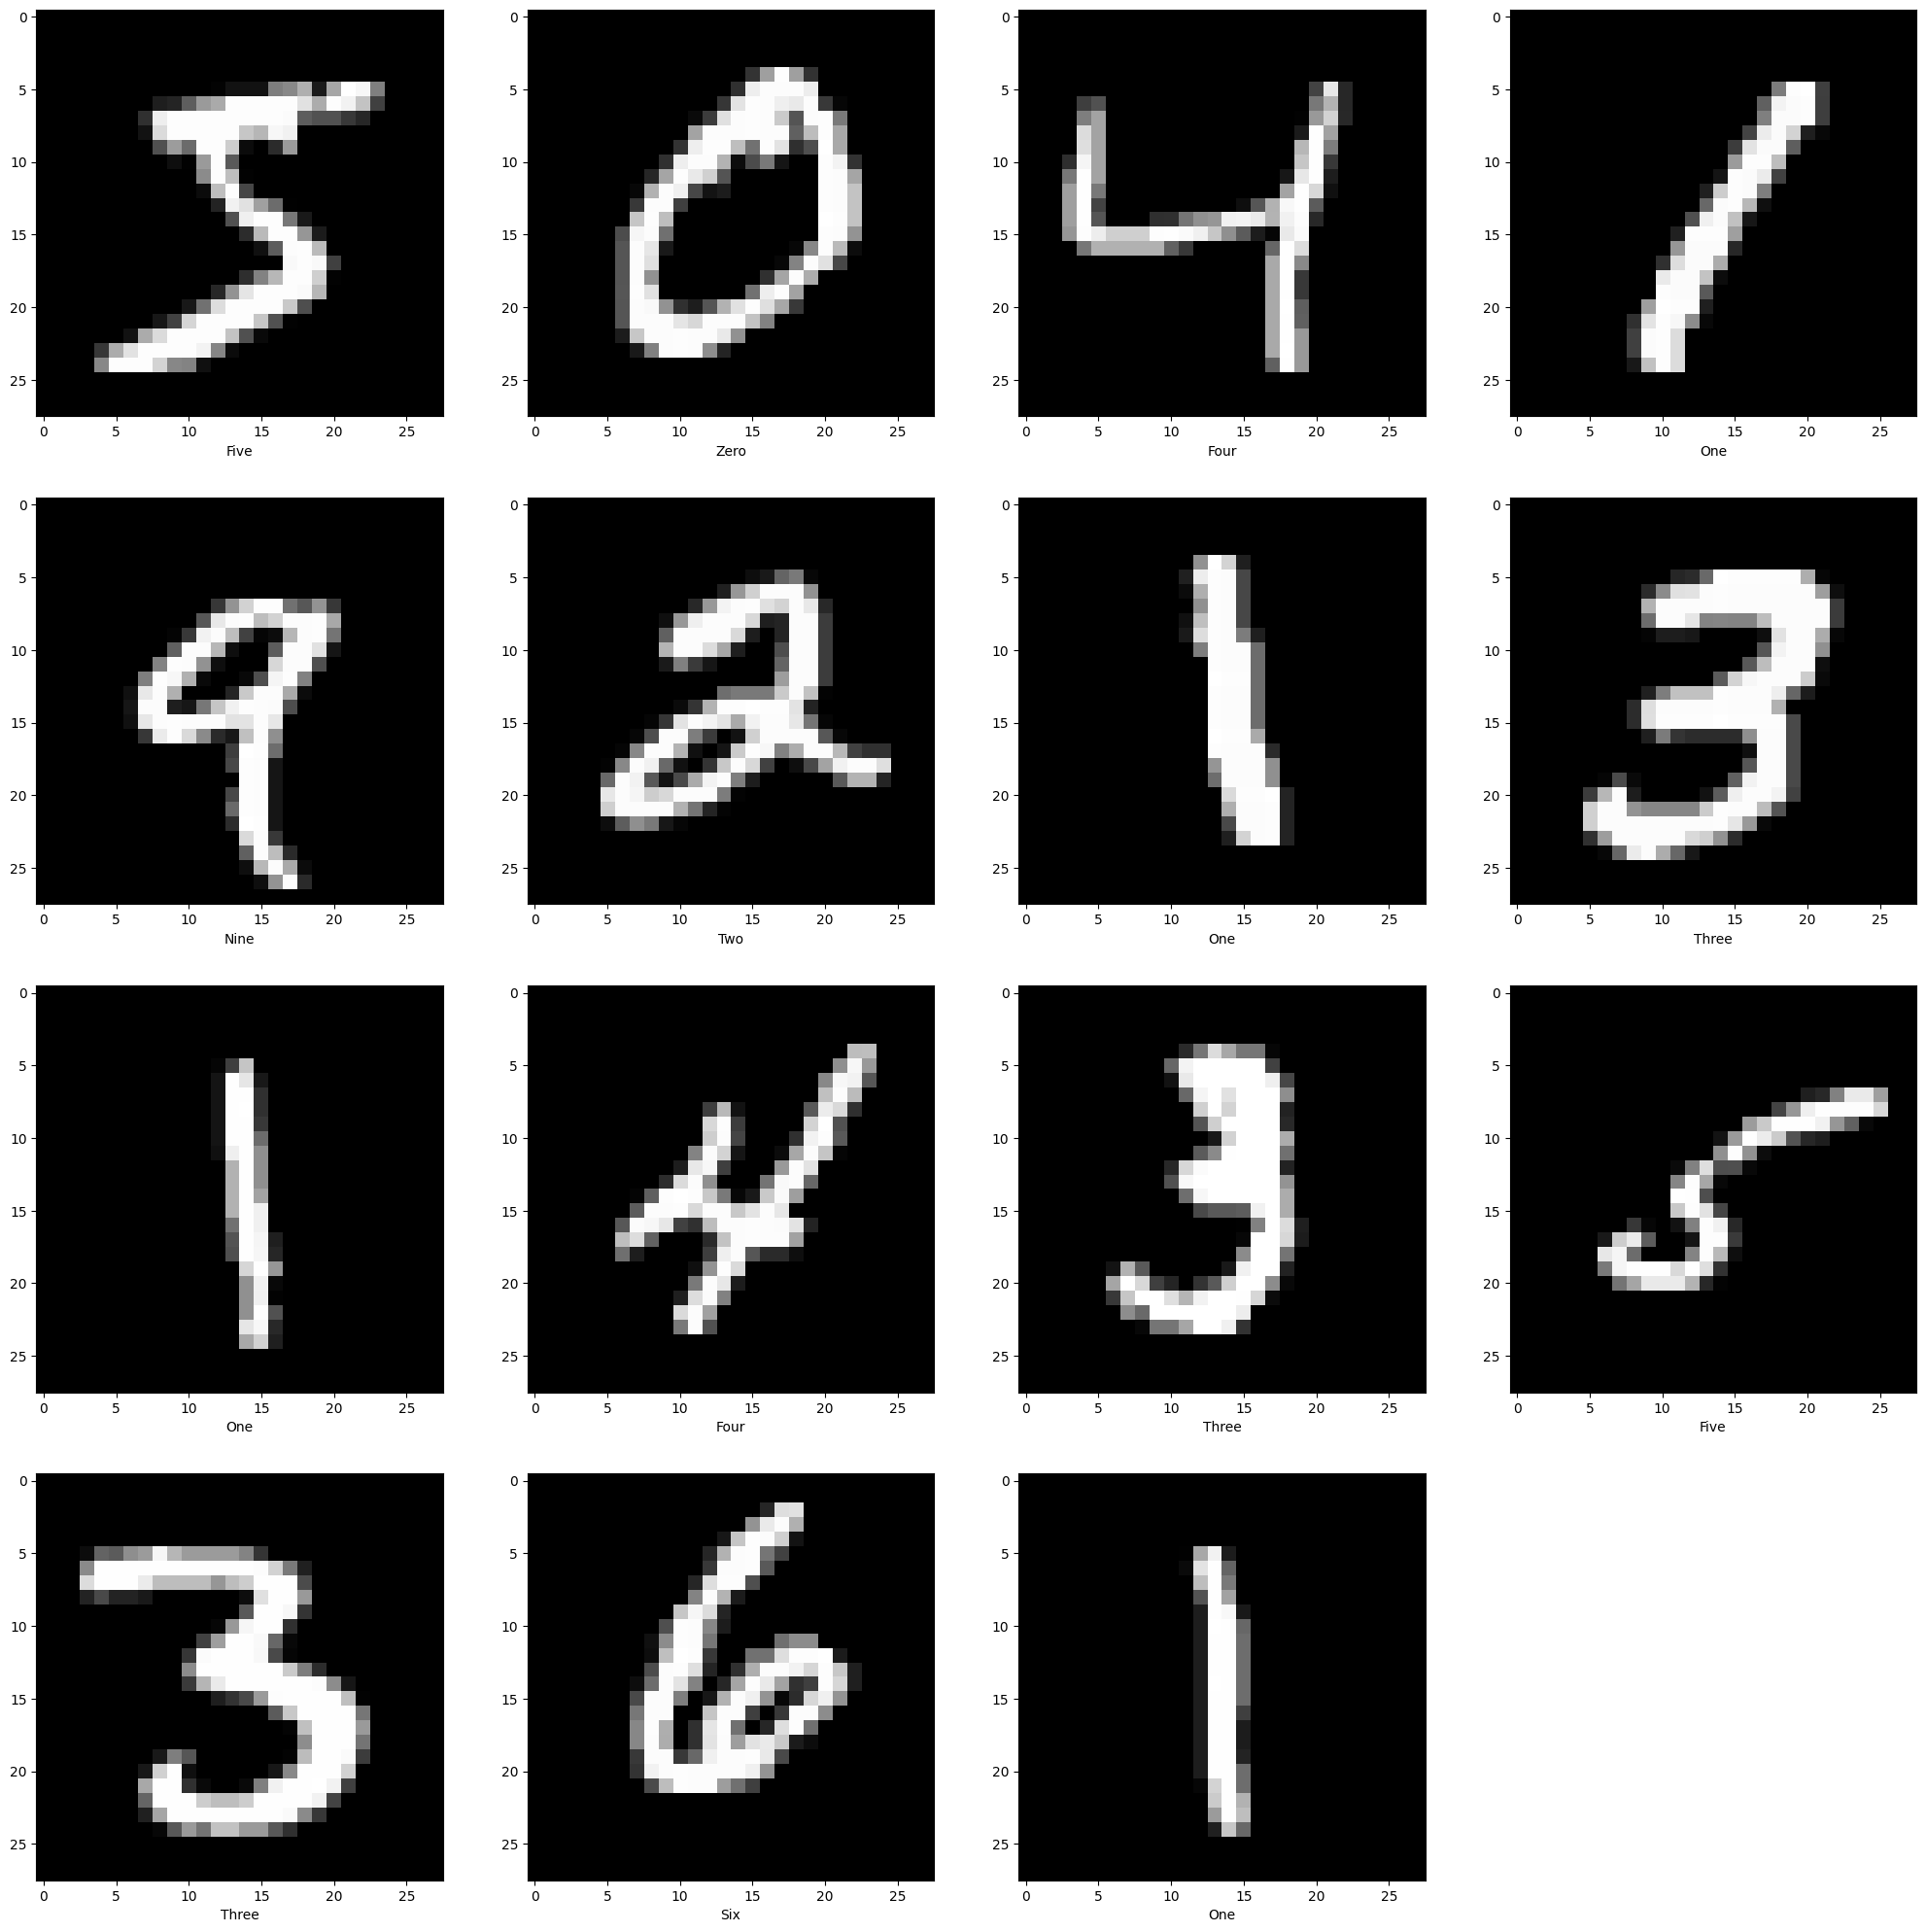

In [17]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
#col_names = ['Seven','Eight','Two','Three','Four','Five','Six','Zero','One','Nine']

#Visualizing the digits
plt.figure(figsize=(25,25))
for i in range(15):
    plt.subplot(4,4,i+1)
    #plt.xticks([])
    #plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

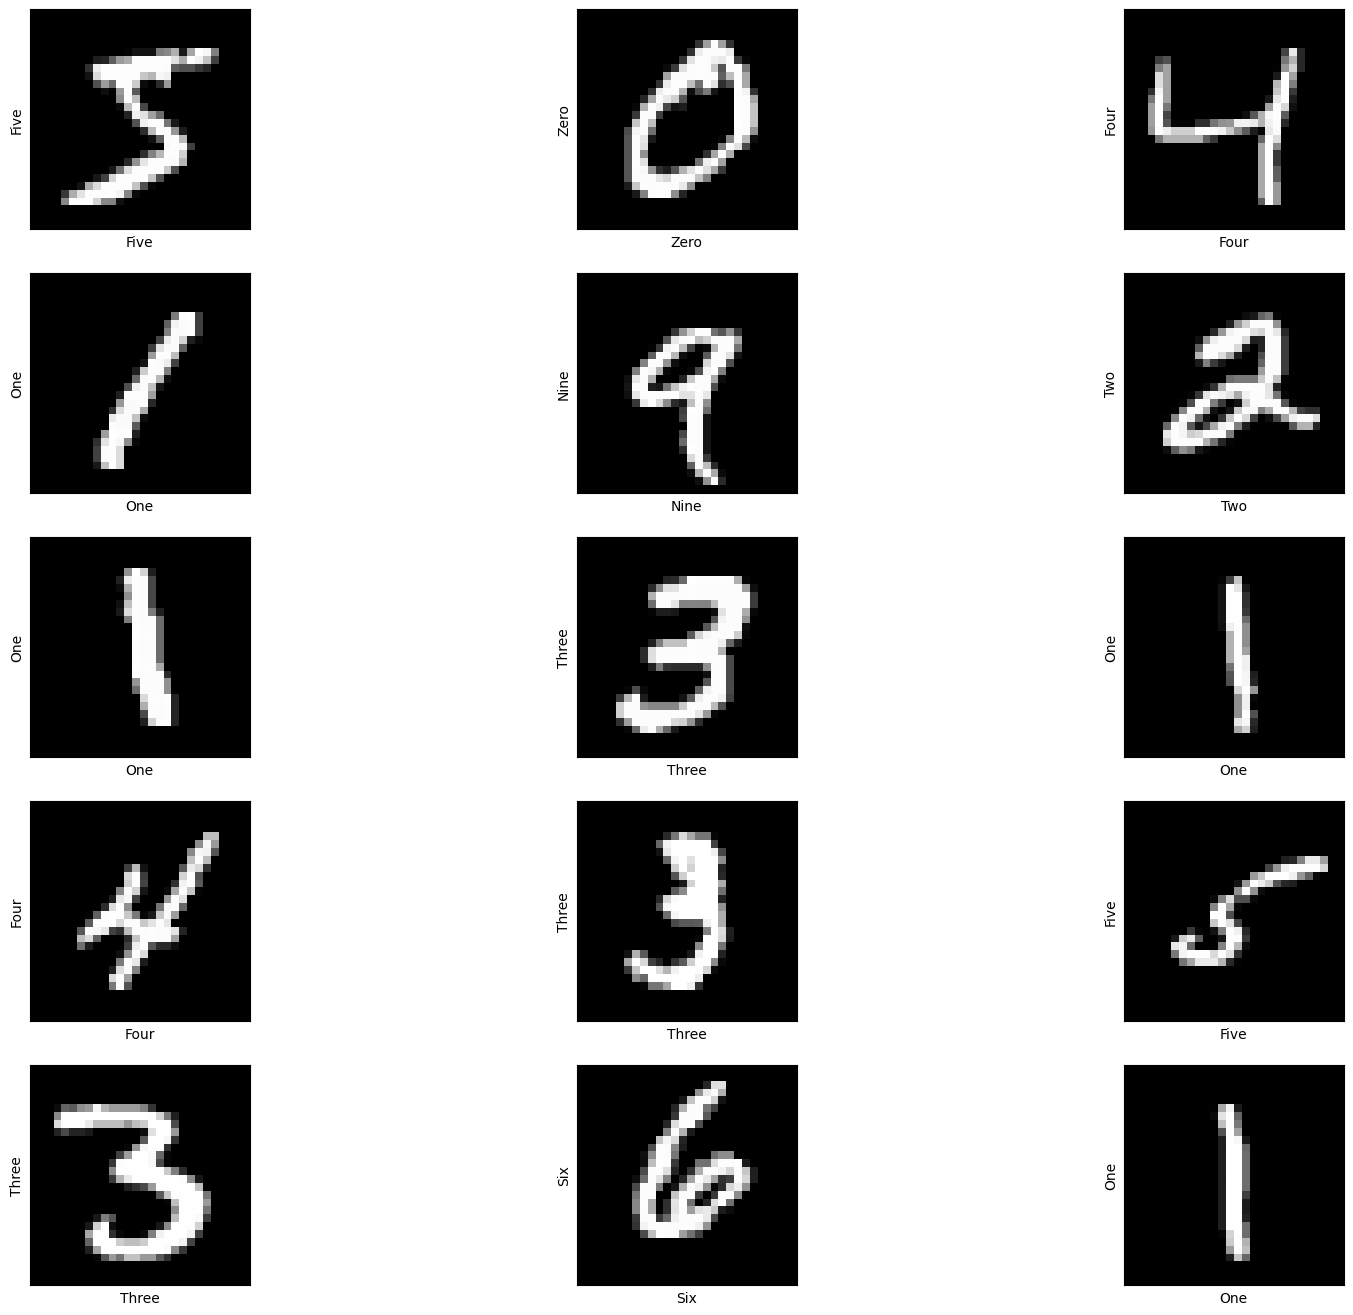

In [18]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
#col_names = ['Seven','Eight','Two','Three','Four','Five','Six','Zero','One','Nine']

#Visualizing the digits
plt.figure(figsize=(20,20))
for i in range(15):
    plt.subplot(6,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
    plt.ylabel(col_names[y_train_digit[i]])
  
plt.show()

In [69]:
X_train_digit.shape

(60000, 784)

# Preprocessing Data- Converting 3D to 2D

In [19]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [20]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [22]:
#Encoding Digit MNIST Labels
#to_categorical takes an array of integers (e.g., y_train_digit which has labels from 0 to 9) and converts 
#each integer into a binary vector with length equal to the number of classes (num_classes=10).
#For example, if a label is 3, it would be represented as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], where 1 is at the index of the label and the rest are 0s.
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [23]:
y_train_digit

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [24]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

#layers.Dense(256, activation='relu', input_shape=(784,)):
#This is the first hidden layer with 256 neurons, using the ReLU activation function.
#input_shape=(784,) specifies the input size for this layer. For MNIST images (28x28 pixels), which are flattened into 784 features, 
#this is required only for the first layer.
#layers.Dense(64, activation='relu') (Second Hidden Layer):
#A second dense layer with 64 neurons and ReLU activation. This helps capture complex patterns by applying additional transformations to the input data.
#layers.Dense(64, activation='relu') (Third Hidden Layer):
#Another hidden layer identical to the previous one, adding further non-linear transformations.
#layers.Dense(10, activation='sigmoid') (Output Layer):
#The output layer with 10 neurons, where each neuron corresponds to a class. Since MNIST has 10 classes (digits 0–9), this layer size matches that.

C:\Users\Prabhu\anaconda3\envs\VEAI\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [28]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7554 - loss: 5.2367 - val_accuracy: 0.9080 - val_loss: 0.3983
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9269 - loss: 0.2873 - val_accuracy: 0.9353 - val_loss: 0.2600
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9514 - loss: 0.1840 - val_accuracy: 0.9488 - val_loss: 0.2008
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9631 - loss: 0.1283 - val_accuracy: 0.9464 - val_loss: 0.2103
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9672 - loss: 0.1164 - val_accuracy: 0.9571 - val_loss: 0.1888
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9731 - loss: 0.0902 - val_accuracy: 0.9600 - val_loss: 0.1655
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9734 - loss: 0.0910 - val_accuracy: 0.9597 - val_loss: 0.1615
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9766 - loss: 0.0783 - val_accuracy: 0.

In [29]:
# Assuming y_train_digit and y_test_digit are the class labels (0-9)
y_train_digit = to_categorical(y_train_digit, num_classes=10)
y_test_digit = to_categorical(y_test_digit, num_classes=10)

# Verify the shape after encoding
print(y_train_digit.shape)  # Should be (num_samples, 10)
print(y_test_digit.shape)   # Should be (num_samples, 10)


(60000, 10, 10)
(10000, 10, 10)


In [30]:
# Assuming that y_train_digit and y_test_digit are already 2D arrays due to an error
y_train_digit = y_train_digit.reshape(-1, 10)  # Flattens it to (60000, 10)
y_test_digit = y_test_digit.reshape(-1, 10)    # Flattens it to (10000, 10)


In [31]:
print(y_train_digit.shape)  # Should be (num_samples, 10)
print(y_test_digit.shape)

(600000, 10)
(100000, 10)


In [32]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 60000
'y' sizes: 600000


In [ ]:
test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)

In [ ]:
print(y_test_digit.shape)  # Check the shape of y_test_digit


In [ ]:
print(y_train_digit.shape) 

In [33]:
# Assuming y_train_digit and y_test_digit have been incorrectly extended:
y_train_digit = y_train_digit[:60000]  # Get first 60,000 samples
y_test_digit = y_test_digit[:10000]  # Get first 10,000 samples


In [34]:
print(y_train_digit.shape)  # Should be (60000, 10)
print(y_test_digit.shape)  # Should be (10000, 10)


(60000, 10)
(10000, 10)


In [35]:
history = model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10, validation_data=(X_test_digit, y_test_digit))


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8733 - loss: 0.8787 - val_accuracy: 0.9000 - val_loss: 0.3357
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8990 - loss: 0.3330 - val_accuracy: 0.9000 - val_loss: 0.3348
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9015 - loss: 0.3244 - val_accuracy: 0.9000 - val_loss: 0.3282
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9005 - loss: 0.3243 - val_accuracy: 0.9000 - val_loss: 0.3279
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9007 - loss: 0.3234 - val_accuracy: 0.9000 - val_loss: 0.3281
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9003 - loss: 0.3204 - val_accuracy: 0.9000 - val_loss: 0.3307
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9003 - loss: 0.3202 - val_accuracy: 0.9000 - val_loss: 0.3316
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9004 - loss: 0.3177 - val_accuracy: 0.

In [36]:
test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9000 - loss: 0.3372


In [37]:
print('Digit MNIST Test accuracy:', round(test_acc_digit,4))

Digit MNIST Test accuracy: 0.9


In [38]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [39]:
y_predict[0]

array([9.9971068e-01, 9.9667937e-01, 4.8109888e-07, 5.2173630e-09,
       7.1682899e-07, 2.9410359e-08, 3.4895699e-08, 3.3404067e-08,
       1.2688959e-09, 1.4451174e-08], dtype=float32)

In [40]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [42]:
print(y_predicts[0])

0


In [43]:
y_test_digit_eval

array([0, 0, 0, ..., 0, 0, 1])

In [44]:
y_pre=pd.DataFrame(y_predicts)

In [45]:
y_pre

,0
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [46]:
y_test_digit_eval

array([0, 0, 0, ..., 0, 0, 1])

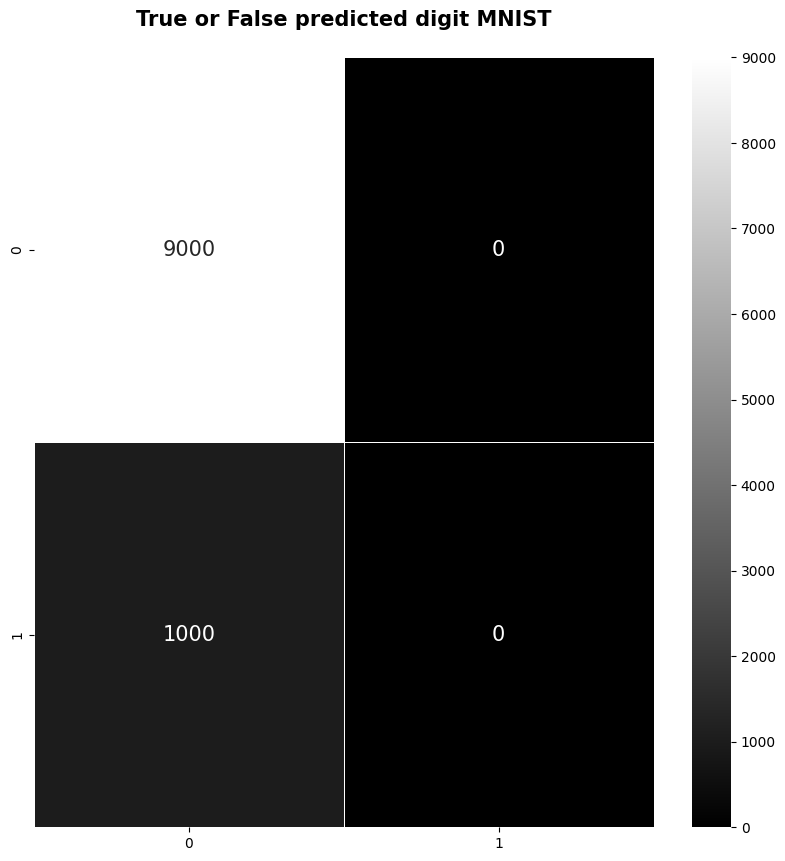

In [55]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
#plt.style.use('seaborn-deep')
#plt.style.use('Solarize_Light2')  # Or any other available style
#plt.style.use('seaborn-v0_8-deep')
plt.style.use('default')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [50]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9000
           1       0.00      0.00      0.00      1000

    accuracy                           0.90     10000
   macro avg       0.45      0.50      0.47     10000
weighted avg       0.81      0.90      0.85     10000



C:\Users\Prabhu\anaconda3\envs\VEAI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prabhu\anaconda3\envs\VEAI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prabhu\anaconda3\envs\VEAI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


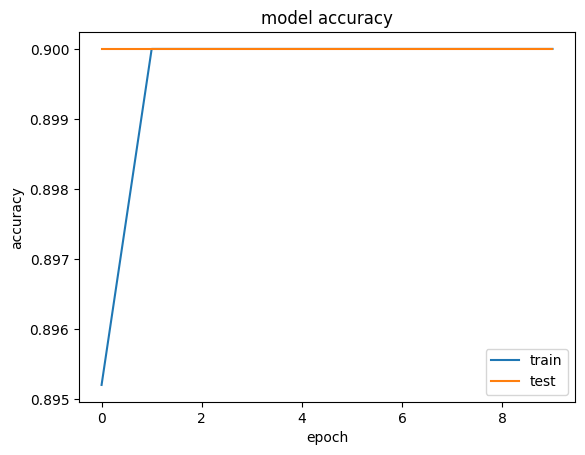

In [58]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

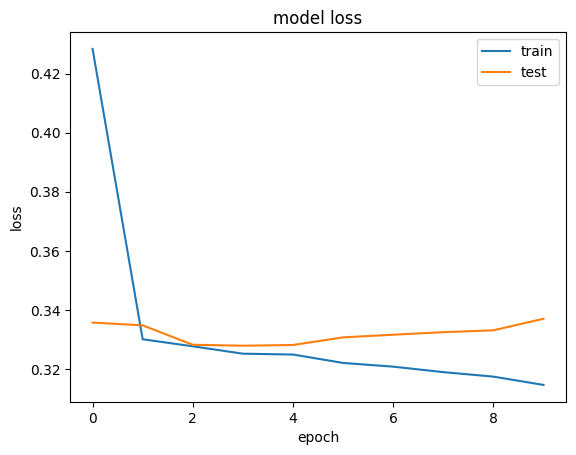

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [60]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [62]:
print(y_predicts_single[0])

0


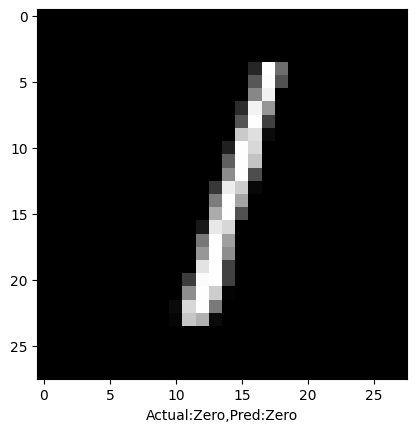

In [63]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()

In [68]:
y_test_digit[5]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])